In [46]:
import pandas as pd  
import matplotlib.pyplot as plt

In [47]:
Tatanic_DF = pd.read_csv(r'C:\Users\a\Desktop\EX_PANDAS\data\titanic.csv')

In [48]:
Tatanic_DF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
Target_DF= Tatanic_DF[['survived','sex','age']]

In [50]:
Target_DF['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [51]:
Target_DF.isna().sum()

survived      0
sex           0
age         177
dtype: int64

In [52]:
mean_age_female = round(Target_DF[Target_DF['sex'] == 'female']['age'].mean(),1)
mean_age_male = round(Target_DF[Target_DF['sex'] == 'male']['age'].mean(),1)

In [53]:
mean_age_female

27.9

In [54]:
def fill_age(row):
    if pd.isna(row['age']):
        if row['sex'] == 'female':
            return mean_age_female
        elif row['sex'] == 'male':
            return mean_age_male
    else:
        return row['age']

In [55]:
Target_DF['age'] = Target_DF.apply(fill_age, axis=1)

C:\Users\a\AppData\Local\Temp\ipykernel_1704\44145311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target_DF['age'] = Target_DF.apply(fill_age, axis=1)


In [56]:
Target_DF

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,27.9
889,1,male,26.0


In [57]:
Target_DF.isna().sum()

survived    0
sex         0
age         0
dtype: int64

In [58]:
Survived_DF = Target_DF[Target_DF['survived'] == 1]

In [59]:
Survived_DF

,survived,sex,age
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
8,1,female,27.0
9,1,female,14.0
...,...,...,...
875,1,female,15.0
879,1,female,56.0
880,1,female,25.0
887,1,female,19.0


In [60]:
sex_counts = Survived_DF['sex'].value_counts()

In [61]:
Survived_DF

,survived,sex,age
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
8,1,female,27.0
9,1,female,14.0
...,...,...,...
875,1,female,15.0
879,1,female,56.0
880,1,female,25.0
887,1,female,19.0


In [62]:
def set_customFont(font_path):
    from matplotlib import font_manager as fm,rc
 
    font_name = fm.FontProperties(fname = font_path).get_name()

    rc('font',family = font_name)

set_customFont(r'C:\Windows\Fonts\malgunbd.ttf')

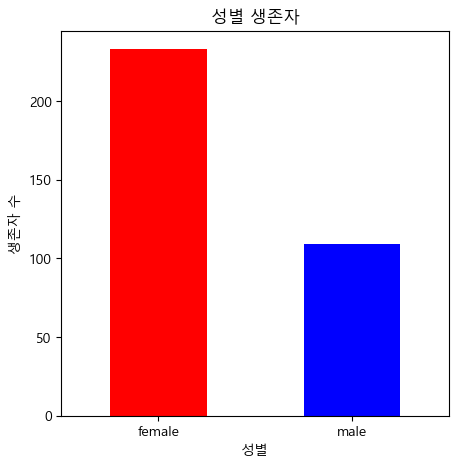

In [63]:
plt.figure(figsize=(5, 5))
sex_counts.plot(kind='bar', color=['r','b'])
plt.title('성별 생존자')
plt.xlabel('성별')
plt.ylabel('생존자 수')
plt.xticks(rotation = 0)
plt.show()

In [67]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70]
Survived_DF =  Survived_DF.groupby('age', bins=age_bins)

TypeError: groupby() got an unexpected keyword argument 'bins'

In [ ]:
Survived_DF

1      (30, 40]
2      (20, 30]
3      (30, 40]
8      (20, 30]
9      (10, 20]
         ...   
875    (10, 20]
879    (50, 60]
880    (20, 30]
887    (10, 20]
889    (20, 30]
Name: age, Length: 342, dtype: category
Categories (7, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [ ]:
age_sex_counts = Survived_DF.groupby(['age_group', 'sex']).size().unstack(fill_value=0)

KeyError: 'age_group'

In [ ]:
age_sex_counts.value_counts()

female  male
3       1       1
13      4       1
19      19      1
21      12      1
34      10      1
46      39      1
97      23      1
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

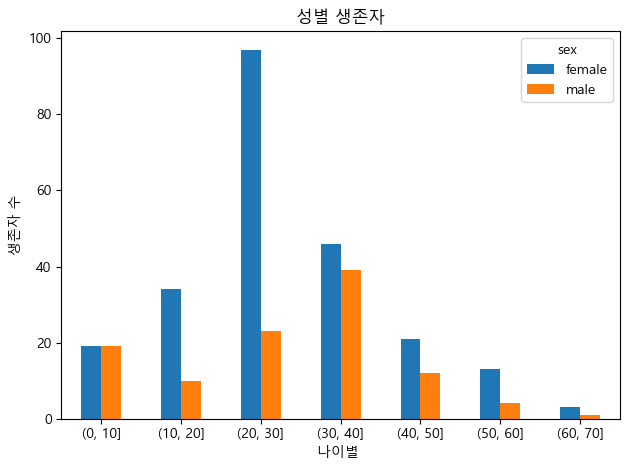

In [ ]:
plt.figure()
age_sex_counts.plot(kind='bar',)
plt.title('성별 생존자')
plt.xlabel('나이별 ')
plt.ylabel('생존자 수')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()